# Notebook 1: Business Understanding

This notebook will contain the visualisation and gathering of users data on Spotify.

## 1. Data acquisition

Spotify provides a [Web API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) that lets developers obtain a track's features given its *unique Spotify ID*. This section of the notebook aims at testing the API.

`track_features_fetcher.py` already contains a function `get_track_features` that, given a track ID in Spotify, returns the features associated to the track.

In [89]:
from track_features_fetcher import get_track_features

This function can be used by providing the Spotify URL to the track.

![](docs/get_track_link.png)

To get a taste of how gathering the data would look like, here is the output of the song for an arbitrary track.

In [90]:
get_track_features('https://open.spotify.com/track/0GELyRjqIrjkqA53BL9Tov?si=b25a4995f6be4a58')

{'danceability': 0.461,
 'energy': 0.501,
 'key': 5,
 'loudness': -6.455,
 'mode': 0,
 'speechiness': 0.0678,
 'acousticness': 0.576,
 'instrumentalness': 1.49e-06,
 'liveness': 0.092,
 'valence': 0.561,
 'tempo': 158.095}

A dataset can then be put together and annotated by the user for further analysis.

## 2. Exploratory Data Analysis

The data used for this section was annotated and made ready for download by [GeorgeMcIntire](https://www.kaggle.com/code/jaiswal003/spotify-dataset-eda). 

> A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for songs I don't like. 

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
spotify = pd.read_csv('data.csv')

**Dataset Overview**

In [3]:
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
spotify.shape

(2017, 17)

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Notice how the `time_signature` attribute contains a large number of repeated values equal to `4`. This column will be dropped later on.

**Checking for missing values**

In [7]:
spotify.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

The dataset doesn't contain any `NaN` cells.

**Checking for duplicate values**

In [8]:
spotify.drop_duplicates(inplace=True)
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
spotify.value_counts("target")

target
1    1020
0     997
dtype: int64

The dataset contains `1020` tracks liked by the user and `997` disliked tracks.

### Data Visualization

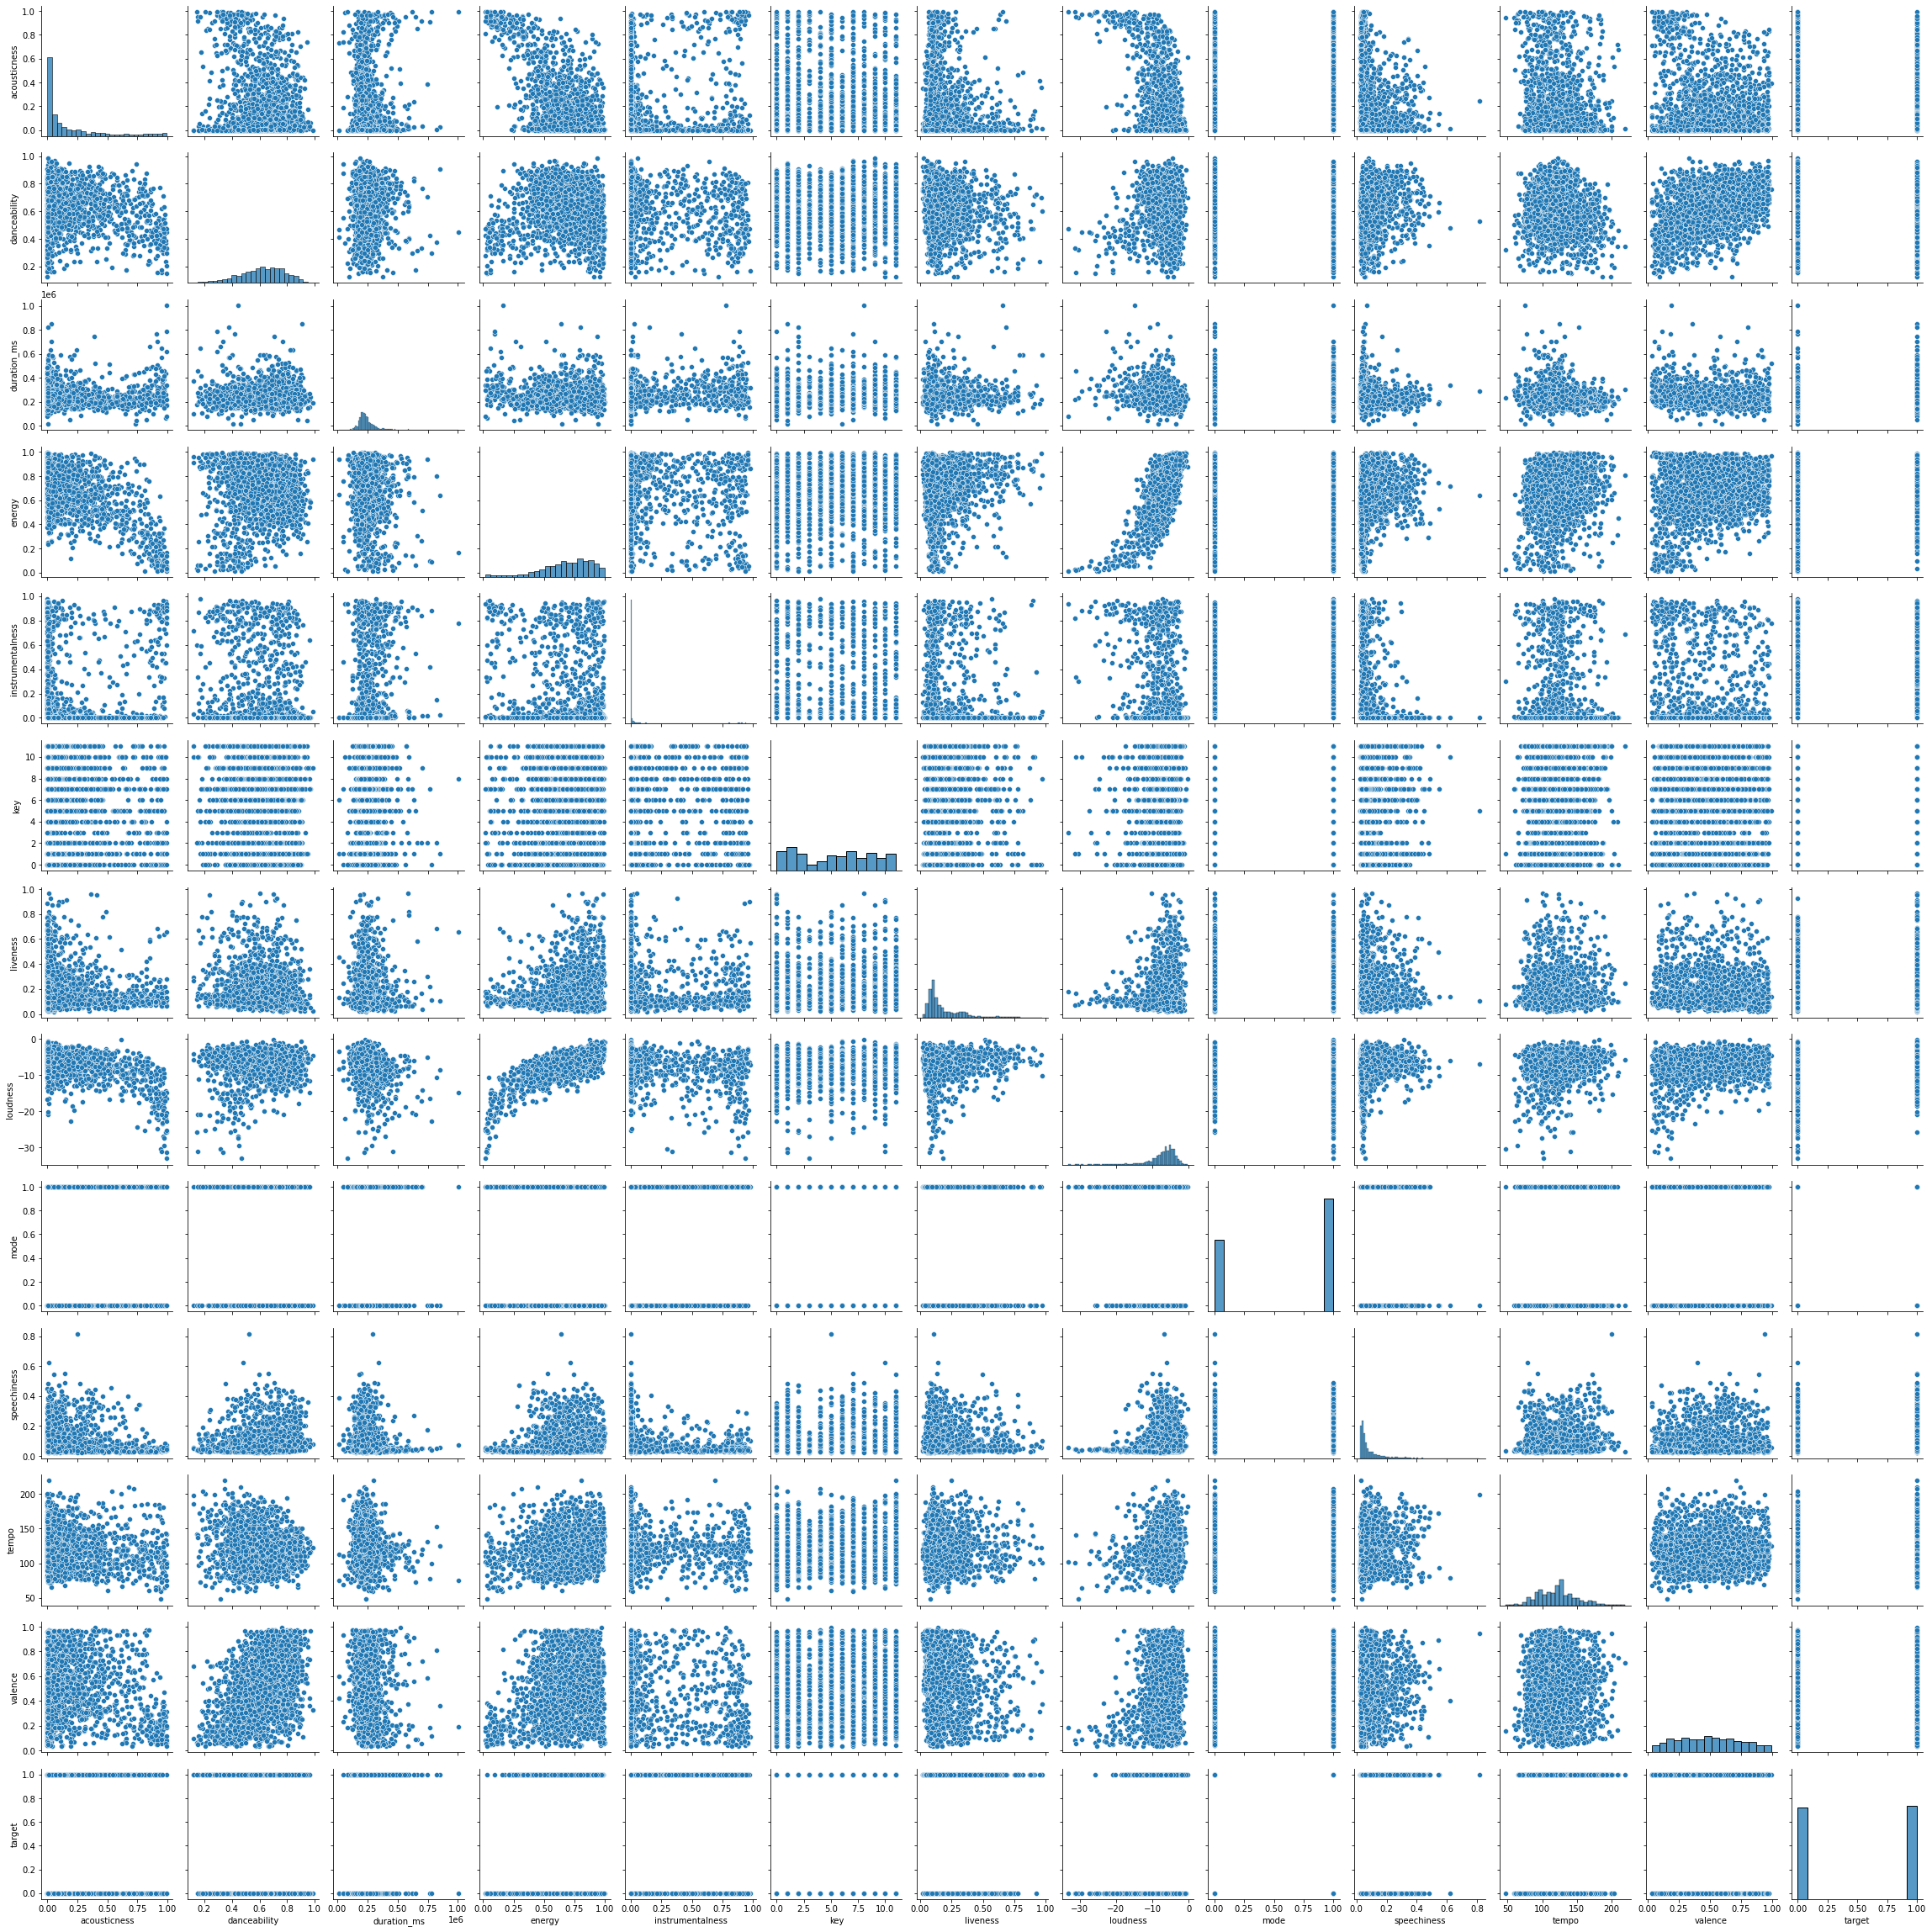

In [10]:
d_spotify=spotify.drop(columns=['Unnamed: 0','song_title','artist','time_signature'],inplace=False)
sns.pairplot(d_spotify)

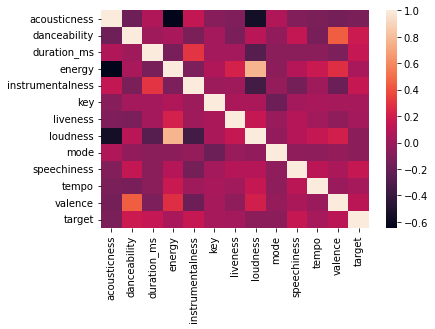

In [11]:
sns.heatmap(d_spotify.corr(method='pearson')) #pearson : standard correlation coefficient
plt.show()

Since the **energy** and **loudness** attributes have high correlation, we can drop one of them. We choose to drop energy.

In [12]:
d_spotify.drop(columns='energy',inplace=True)
d_spotify.head()

,acousticness,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,target
0,0.0102,0.833,204600,0.021900,2,0.1650,-8.795,1,0.4310,150.062,0.286,1
1,0.1990,0.743,326933,0.006110,1,0.1370,-10.401,1,0.0794,160.083,0.588,1
2,0.0344,0.838,185707,0.000234,2,0.1590,-7.148,1,0.2890,75.044,0.173,1
3,0.6040,0.494,199413,0.510000,5,0.0922,-15.236,1,0.0261,86.468,0.230,1
4,0.1800,0.678,392893,0.512000,5,0.4390,-11.648,0,0.0694,174.004,0.904,1


### Removing the outliers 

#### Standarization

The following code tests three different scalers within `sklearn.preprocessing` which are `RobustScaler`, `StandardScaler`, and `MinMaxScaler`.

The attributes that were standardized are: **duration_ms**, **key**, **loudness**, and **tempo**.

In [39]:
normalized_attrs = ['duration_ms','key','loudness','tempo']
untouched_attrs = ['acousticness','danceability','instrumentalness','liveness','mode','speechiness','valence','target']

x = pd.DataFrame(d_spotify,columns = normalized_attrs)

# initialising the scalers
robust_scaler = preprocessing.RobustScaler()
std_scaler = preprocessing.StandardScaler()
minmax_scaler = preprocessing.MinMaxScaler()



robust_spotify = robust_scaler.fit_transform(x)
robust_spotify = pd.DataFrame(robust_spotify, columns=normalized_attrs)
for i in untouched_attrs:
    robust_spotify[i] = d_spotify[i]


standard_spotify = std_scaler.fit_transform(x)
standard_spotify=pd.DataFrame(standard_spotify, columns=normalized_attrs)
for i in untouched_attrs:
    standard_spotify[i] = d_spotify[i]
    
    
minmax_spotify = minmax_scaler.fit_transform(x)
minmax_spotify=pd.DataFrame(minmax_spotify, columns=normalized_attrs)
for i in untouched_attrs:
    minmax_spotify[i] = d_spotify[i]
    
    
print(robust_spotify.head())
print(standard_spotify.head())
print(minmax_spotify.head())

   duration_ms       key  loudness     tempo  acousticness  danceability  \
0    -0.350707 -0.571429 -0.698191  0.760356        0.0102         0.833   
1     1.389004 -0.714286 -1.138432  1.026447        0.1990         0.743   
2    -0.619386 -0.571429 -0.246711 -1.231625        0.0344         0.838   
3    -0.424472 -0.142857 -2.463816 -0.928279        0.6040         0.494   
4     2.327029 -0.142857 -1.480263  1.396097        0.1800         0.678   

   instrumentalness  liveness  mode  speechiness  valence  target  
0          0.021900    0.1650     1       0.4310    0.286       1  
1          0.006110    0.1370     1       0.0794    0.588       1  
2          0.000234    0.1590     1       0.2890    0.173       1  
3          0.510000    0.0922     1       0.0261    0.230       1  
4          0.512000    0.4390     0       0.0694    0.904       1  
   duration_ms       key  loudness     tempo  acousticness  danceability  \
0    -0.508851 -0.916446 -0.454530  1.066709        0.0102 

We choose to continue the analysis with `StandardScaler`

#### Blox plot

In [40]:
fig = plt.figure()

<Figure size 1080x360 with 0 Axes>

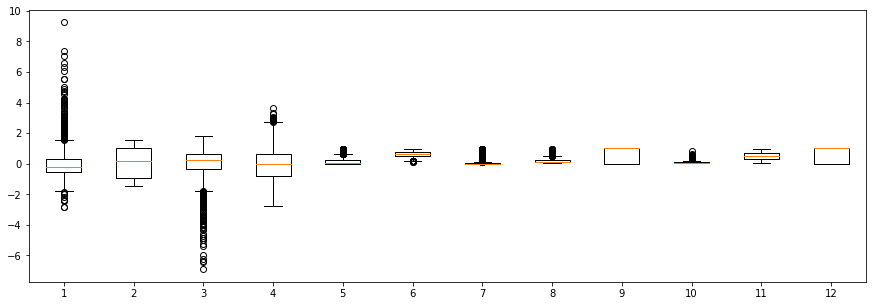

In [41]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.boxplot(standard_spotify)
plt.show()

In [42]:
standard_spotify.describe()

,duration_ms,key,loudness,tempo,acousticness,danceability,instrumentalness,liveness,mode,speechiness,valence,target
count,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,-8.548222e-17,7.166635e-17,2.343468e-16,-2.842435e-16,0.187590,0.618422,0.133286,0.190844,0.612295,0.092664,0.496815,0.505702
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,0.259989,0.161029,0.273162,0.155453,0.487347,0.089931,0.247195,0.500091
min,-2.809419e+00,-1.464792e+00,-6.916536e+00,-2.764133e+00,0.000003,0.122000,0.000000,0.018800,0.000000,0.023100,0.034800,0.000000
25%,-5.647920e-01,-9.164464e-01,-3.479027e-01,-8.026643e-01,0.009630,0.514000,0.000000,0.092300,0.000000,0.037500,0.295000,0.000000
50%,-2.079659e-01,1.802444e-01,2.227279e-01,-6.607136e-03,0.063300,0.631000,0.000076,0.127000,1.000000,0.054900,0.492000,1.000000
75%,2.931475e-01,1.002763e+00,6.221161e-01,6.089335e-01,0.265000,0.738000,0.054000,0.247000,1.000000,0.108000,0.691000,1.000000
max,9.252160e+00,1.551108e+00,1.802465e+00,3.663097e+00,0.995000,0.984000,0.976000,0.969000,1.000000,0.816000,0.992000,1.000000


we can see that there is a great number of outliers for duration we will see each feature's boxplot

##### `duration_ms`

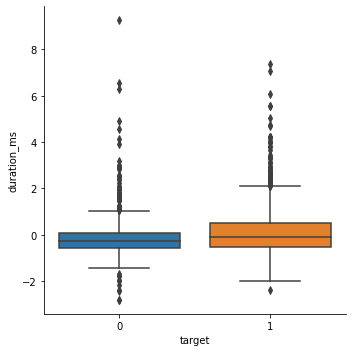

In [43]:
sns.catplot(data=standard_spotify, x='target', y='duration_ms', kind='box')

In [44]:
#standard_spotify[standard_spotify['target']==1][standard_spotify['duration_ms']<-2] =936
d1=standard_spotify[standard_spotify['duration_ms'].between(-2, 2)]

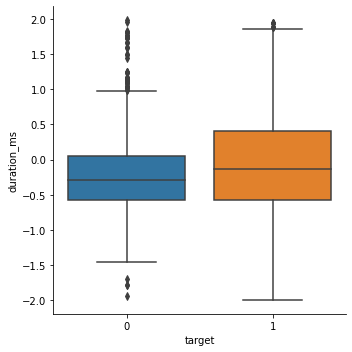

In [45]:
sns.catplot(data=d1, x='target', y='duration_ms', kind='box')

In [46]:
d1.shape

(1927, 12)

#### `loudness`

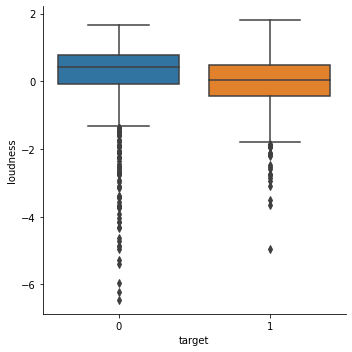

In [47]:
sns.catplot(data=d1, x='target', y='loudness', kind='box')

In [48]:
#d1[d1['target']==1][d1['loudness']<-4] =817
d1=d1[d1['duration_ms']>-2]

In [49]:
d1.shape

(1927, 12)

#### `liveness`

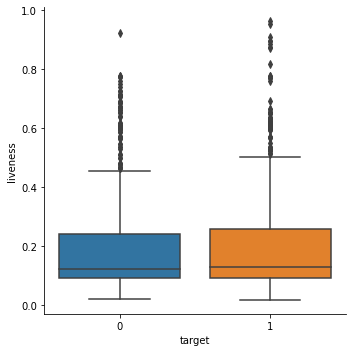

In [50]:
sns.catplot(data=d1, x='target', y='liveness', kind='box')

In [51]:
#d1[d1['target']==0][d1['liveness']>0.8] =1432
d1=d1[d1['duration_ms']<0.5]

In [52]:
d1.shape

(1622, 12)

#### `speechiness`

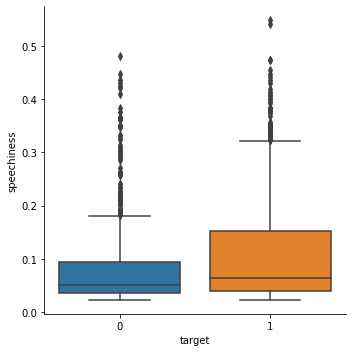

In [53]:
sns.catplot(data=d1, x='target', y='speechiness', kind='box')

In [54]:
d1=d1[d1['speechiness']<0.2]

In [55]:
d1.head()

,duration_ms,key,loudness,tempo,acousticness,danceability,instrumentalness,liveness,mode,speechiness,valence,target
3,-0.572137,-0.093928,-2.167220,-1.316964,0.60400,0.494,0.510000,0.0922,1,0.0261,0.230,1
5,0.061331,0.728590,0.107325,-1.371127,0.00479,0.804,0.000000,0.1640,1,0.1850,0.264,1
6,-0.059860,-1.190619,-1.095094,-1.558278,0.01450,0.739,0.000007,0.2070,1,0.1560,0.308,1
13,-0.037044,-1.464792,-1.489164,0.314994,0.36600,0.762,0.000000,0.1030,1,0.1140,0.367,1
14,0.011979,1.002763,-0.327428,0.127731,0.44000,0.662,0.000000,0.0972,0,0.0793,0.351,1


In [56]:
d1.shape

(1427, 12)

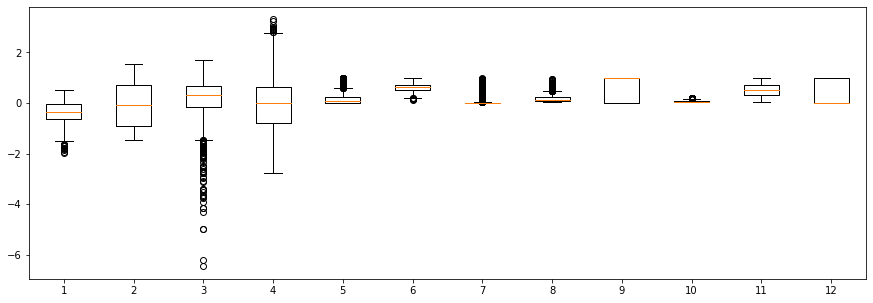

In [57]:
plt.boxplot(d1)
plt.show()

#### Removing outliers

Removing all of the outliers for this dataset is not a viable option as the song attributes tend to vary highly.

In [62]:
# Extract column names with the columns attribute
print(list(d1.columns))

['duration_ms', 'key', 'loudness', 'tempo', 'acousticness', 'danceability', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'valence', 'target']


In [68]:
d1_filtered = d1
for col in d1.columns:
    q_low = d1[col].quantile(0.01)
    q_hi  = d1[col].quantile(0.99)

    d1_filtered = d1_filtered[(d1_filtered[col] < q_hi) & (d1_filtered[col] > q_low)]
    print(len(d1_filtered))

1397
1133
1111
1095
1081
1060
658
646
0
0
0
0


In [66]:
len(d1_filtered)

0